In [1]:
import rasterio as rio
import geopandas as gpd 
from notebooks import config
import matplotlib.pyplot as plt
from utils.imgShow import imgShow

In [2]:
### val scenes and predictions
paths_scene =  config.paths_scene_val
paths_dem = config.paths_dem_val
paths_truth = config.paths_truth_vec_val 
scene_ids = [path.split('/')[-1].split('.')[0] for path in paths_truth]  # get scene ids from truth paths
paths_scene_gla_pred = [config.dir_result + scene_id + '_pred_cla_p256.tif' 
                                    for scene_id in scene_ids]
paths_scene_gla_pred_2 = [config.dir_result + scene_id + '_pred_cla_p1024.tif' 
                                    for scene_id in scene_ids]
paths_scene_gla_pred[0] 


'data/result/l5_scene_01_pred_cla_p256.tif'

In [3]:
# ### save to vector
# for id in range(len(scene_ids)):
#         with rio.open(paths_scene_gla_pred[id]) as pred_src:
#                 pred_arr = pred_src.read(1)  
#                 pred_transfrom = pred_src.transform
#                 pred_crs = pred_src.crs 
#                 results = (
#                         {'properties': {'value': v}, 'geometry': s}
#                         for s, v in features.shapes(pred_arr.astype(np.float32), transform=pred_transfrom)
#                         )
#                 pred_gdf = gpd.GeoDataFrame.from_features(
#                 features=results,
#                 crs=pred_crs)
#                 pred_gdf = pred_gdf[pred_gdf['value'] == 1]
#         pred_gdf.to_file(paths_scene_gla_pred[id].replace('.tif', '.gpkg'),  driver='GPKG')
#         # break


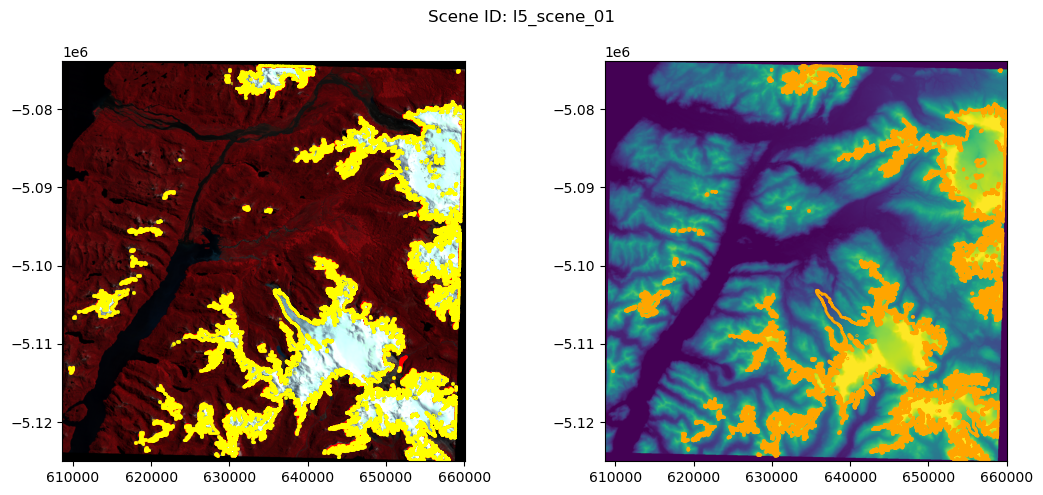

In [8]:
## load and show the image and the prediction map
# id = 0
for id in range(len(paths_scene)):
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))
        with rio.open(paths_scene[id]) as img_src:
                scene_arr = img_src.read().transpose(1, 2, 0)  # change to channel
                extent_scene = [img_src.bounds[0], img_src.bounds[2], 
                                img_src.bounds[1], img_src.bounds[3]]
        with rio.open(paths_dem[id]) as dem_src:
                dem_arr = dem_src.read(1)
        imgShow(scene_arr, ax=ax[0], extent=extent_scene,
                color_bands=[3, 2, 1], clip_percent=5)
        imgShow(dem_arr, ax=ax[1], extent=extent_scene, clip_percent=2)
        truth_gdf = gpd.read_file(paths_truth[id])
        pred_gdf = gpd.read_file(paths_scene_gla_pred[id].replace('.tif', '.gpkg'))
        pred_2_gdf = gpd.read_file(paths_scene_gla_pred_2[id].replace('.tif', '.gpkg'))
        truth_gdf.plot(ax=ax[1], facecolor='none', edgecolor='orange', linewidth=2, label='Truth')
        pred_gdf.plot(ax=ax[0], facecolor='none', edgecolor='red', linewidth=2, label='Pred 256')
        pred_2_gdf.plot(ax=ax[0], facecolor='none', edgecolor='yellow', linewidth=2, label='Pred 1024')
        plt.suptitle(f'Scene ID: {scene_ids[id]}')
        plt.tight_layout()        
        break

